![BAIME banner](https://user-images.githubusercontent.com/47600826/89530907-9b3f6480-d7ef-11ea-9849-27617f6025cf.png)

# Prediction Credit Risk

![credit risk score](https://lh3.googleusercontent.com/proxy/FFZaDEN6DnV9eU-r0dP0qyry5CCS6nqZptUAPuQr3zmG0roO3AYC9sNekOhD9qOhGCUuqjYmLe49yhYCz96gEx5uK0qS3_ro2J74el4rMLIyi5j7Z0wE90WoMV_buPh9C2j8FD2zUXNPOdTdUuCX5j4P8CITX7UU6sNw9gJTJTgnCCQ6AZxT3Tie0TsGFhtQId_LxDk)

## The problem
In this notebook we look at the data we got via this [Kaggle competition](https://www.kaggle.com/uciml/german-credit). 

We will see if we can predict whether or not the credit score is good. 

We will explore the dataset given, check the various features we have and we will make an algorithm that can predict the credit risk.

# Import the important libraries / packages
These packages are needed to load and use the dataset

In [51]:
#Load the packages
import pandas as pd #we use this to load, read and transform the dataset
import numpy as np #we use this for statistical analysis
import matplotlib.pyplot as plt #we use this to visualize the dataset
import seaborn as sns #we use this to make countplots
import sklearn.metrics as sklm #This is to test the models



# Load and explore the dataset
We've gotten a dataset. In this next step I will first load the data set to see how this looks like

In [52]:
#here we load the data
data = pd.read_csv(r'C:\Users\Renate\Documents\GitHub\Data-Projects\Kaggle\Kaggle - Credit risk German data\german_credit_data_withlabel.csv', index_col = 0)

#and immediately I would like to see how this dataset looks like
data.head()

Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    male    2     own             NaN           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little              NaN           2096   
3   45    male    2    free          little           little           7882   
4   53    male    2    free          little           little           4870   

   Duration              Purpose  Risk  
0         6             radio/TV  good  
1        48             radio/TV   bad  
2        12            education  good  
3        42  furniture/equipment  good  
4        24                  car   bad

In [53]:
#now let's look closer at the dataset we got
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


It seems that we have a lot of text / category information (these are of the Dtype 'object') and a few numerical columns (Dtypes 'int64').

The following columns have missing data: 
- Saving accounts
- Checking account

The last column 'Risk' is the column we would like to predict. 

In [54]:
data.shape

(1000, 10)

The dataset consists of 1.000 rows and 10 columns. 

In [55]:
data.describe()

Age          Job  Credit amount     Duration
count  1000.000000  1000.000000    1000.000000  1000.000000
mean     35.546000     1.904000    3271.258000    20.903000
std      11.375469     0.653614    2822.736876    12.058814
min      19.000000     0.000000     250.000000     4.000000
25%      27.000000     2.000000    1365.500000    12.000000
50%      33.000000     2.000000    2319.500000    18.000000
75%      42.000000     2.000000    3972.250000    24.000000
max      75.000000     3.000000   18424.000000    72.000000

It seems that we have some outliers for the credit amount and duration. We will look and handle these later on. 

In [56]:
data.describe(include='O')

Sex Housing Saving accounts Checking account Purpose  Risk
count   1000    1000             817              606    1000  1000
unique     2       3               4                3       8     2
top     male     own          little           little     car  good
freq     690     713             603              274     337   700

In [57]:
#Let's see what the options are in the text columns (the objects)
print(data.nunique())

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64


Seems there are more categorical columns, let's look closer at the different columns

# Credit risk in the dataset
As this is the column we would like to predict, let's look closer to this column. 


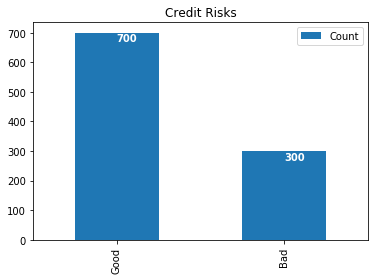

In [58]:
#first let's count the good and bad risks
Good = data[data['Risk'] == 'good']['Risk'].count()
Bad = data[data['Risk'] == 'bad']['Risk'].count()

#now let's put these results in a dataframe to visualize them
df = {"Count" : [Good, Bad]} #this is for the legend to be clear that it is counts
Status = pd.DataFrame(df, index=["Good", "Bad"])

#let's visualize the bar plot
ax = Status.plot(kind = 'bar', title = 'Credit Risks')

#here I want to add the labels to the bars and to make this more clear I've made them white of color
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() - 30), color = 'white', fontweight = 'bold')

In [59]:
#let's see the percentages of the risks:
print('The percentage of good risks : %.2f' % (data['Risk'].value_counts()[0] / len(data)))
print('The percentage of bad risks : %.2f' % (data['Risk'].value_counts()[1] / len(data)))

The percentage of good risks : 0.70
The percentage of bad risks : 0.30


In [60]:
#Changing the Risk column to a percentage.
#good = <25% risk, bad = >75% risk

data['percentage'] = data['Risk'].apply(lambda x: np.random.randint(0,25) if x == 'good' else np.random.randint(75,100))
data.head(25)

Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0    67    male    2     own             NaN           little           1169   
1    22  female    2     own          little         moderate           5951   
2    49    male    1     own          little              NaN           2096   
3    45    male    2    free          little           little           7882   
4    53    male    2    free          little           little           4870   
5    35    male    1    free             NaN              NaN           9055   
6    53    male    2     own      quite rich              NaN           2835   
7    35    male    3    rent          little         moderate           6948   
8    61    male    1     own            rich              NaN           3059   
9    28    male    3     own          little         moderate           5234   
10   25  female    2    rent          little         moderate           1295   
11   24  female    2    rent          little           little           4308   
12   22  female    2     own          little         moderate           1567   
13   60    male    1     own          little           little           1199   
14   28  female    2    rent          little           little           1403   
15   32  female    1     own        moderate           little           1282   
16   53    male    2     own             NaN              NaN           2424   
17   25    male    2     own             NaN           little           8072   
18   44  female    3    free          little         moderate          12579   
19   31    male    2     own      quite rich              NaN           3430   
20   48    male    2     own          little              NaN           2134   
21   44    male    2    rent      quite rich           little           2647   
22   48    male    1    rent          little           little           2241   
23   44    male    2     own        moderate         moderate           1804   
24   26    male    2     own             NaN              NaN           2069   

    Duration              Purpose  Risk  percentage  
0          6             radio/TV  good          13  
1         48             radio/TV   bad          91  
2         12            education  good          16  
3         42  furniture/equipment  good           8  
4         24                  car   bad          76  
5         36            education  good          13  
6         24  furniture/equipment  good          21  
7         36                  car  good          23  
8         12             radio/TV  good           1  
9         30                  car   bad          88  
10        12                  car   bad          85  
11        48             business   bad          94  
12        12             radio/TV  good          23  
13        24                  car   bad          92  
14        15                  car  good          17  
15        24             radio/TV   bad          75  
16        24             radio/TV  good          14  
17        30             business  good          10  
18        24                  car   bad          91  
19        24             radio/TV  good          11  
20         9                  car  good          13  
21         6             radio/TV  good           8  
22        10                  car  good           5  
23        12                  car  good          15  
24        10  furniture/equipment  good          11

In [61]:
data['percentage'].nunique()

50

It looks like this is not well balanced in this set.
But as this is the only data we have, I will leave this as is for now. 

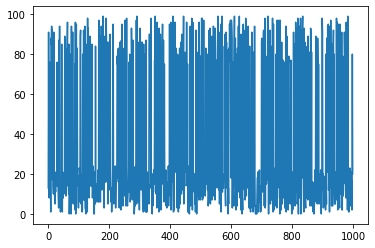

In [62]:
data['percentage'].plot()

# Handling missing values
Let's continue with handling the missing values in this dataset. 

In [63]:
#let's look in what columns there are missing values 
data.isnull().sum().sort_values(ascending = False)

Checking account    394
Saving accounts     183
percentage            0
Risk                  0
Purpose               0
Duration              0
Credit amount         0
Housing               0
Job                   0
Sex                   0
Age                   0
dtype: int64

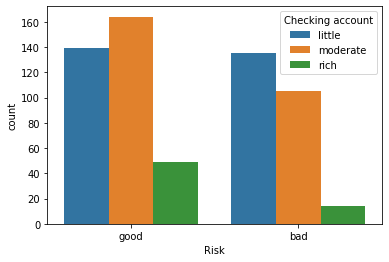

In [64]:
#Let's look at the Checking account in more detail to see what the best way is to handle these missing values
#I will use seaborn for the visualization
sns.countplot(data['Risk'],hue=data['Checking account'])

In [65]:
print(pd.crosstab(data['Checking account'],data['Risk']))

Risk              bad  good
Checking account           
little            135   139
moderate          105   164
rich               14    49


It seems that it might have no influence to whether or not a risk is good or bad, as for little the counts are the same and for moderate the counts are in favor of bad risk and for rich this lies 22% - 78% balance. 

Options in handling these missing values:
- Drop all the rows with missing values
- Handle the missing values with no_inf (so no checking account) as there is nothing clear. 
- We assign the missing values to its nearest neighbors
- Or we ignore this as a good feature and drop this column

In this case I would tend to fill the missing values with 0, as this column is not the best feature

In [66]:
data['Checking account'] = data['Checking account'].fillna('no_inf')
data.isnull().sum().sort_values(ascending = False)

Saving accounts     183
percentage            0
Risk                  0
Purpose               0
Duration              0
Credit amount         0
Checking account      0
Housing               0
Job                   0
Sex                   0
Age                   0
dtype: int64

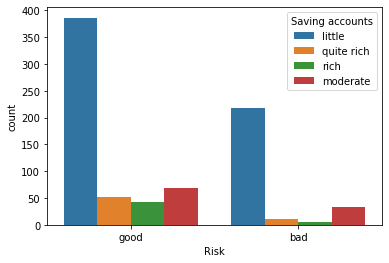

In [67]:
#continue with Saving accounts
sns.countplot(data['Risk'],hue=data['Saving accounts'])

Also here we see no real correlation to the risk. Let's handle them as we did the Checking account

In [68]:
data['Saving accounts'] = data['Saving accounts'].fillna('no_inf')
data.isnull().sum().sort_values(ascending = False)

percentage          0
Risk                0
Purpose             0
Duration            0
Credit amount       0
Checking account    0
Saving accounts     0
Housing             0
Job                 0
Sex                 0
Age                 0
dtype: int64

# Take a closer look at some of the features
let's look at the outliers!

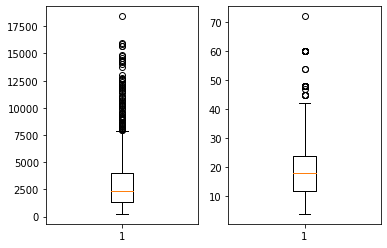

In [69]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.boxplot(data['Credit amount'])
ax2.boxplot(data['Duration'])
ax.set_ylabel('Counts')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1afcaf94f60>,
 'caps': [<matplotlib.lines.Line2D at 0x1afcaf9f940>,
 'boxes': [<matplotlib.lines.Line2D at 0x1afcaf94e10>],
 'medians': [<matplotlib.lines.Line2D at 0x1afcaf9ffd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1afcaf9ff60>],
 'means': []}

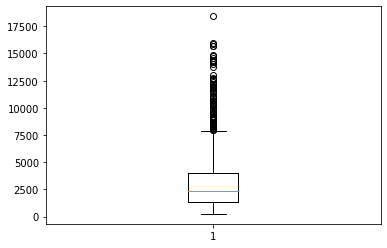

In [70]:
#Look closely at the Credit amount column.
plt.boxplot(data['Credit amount'])

In [71]:
#We see that there is one great outlier here. 
#let's look closer to this one
outliers = data[data['Credit amount'] > 16000]
outliers.head()

Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
915   32  female    3     own          little         moderate          18424   

     Duration          Purpose Risk  percentage  
915        48  vacation/others  bad          88

Let's leave this one in, as the risk is bad, but the amount is fairly high, so this is a high risk customer!! 

{'whiskers': [<matplotlib.lines.Line2D at 0x1afcb003dd8>,
 'caps': [<matplotlib.lines.Line2D at 0x1afcb010518>,
 'boxes': [<matplotlib.lines.Line2D at 0x1afcb0039e8>],
 'medians': [<matplotlib.lines.Line2D at 0x1afcb010ba8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1afcb010ef0>],
 'means': []}

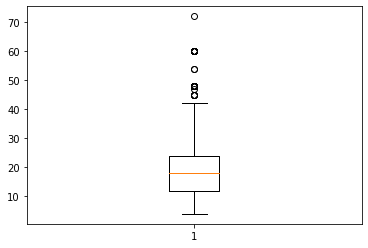

In [72]:
#Look closely at the Credit amount column.
plt.boxplot(data['Duration'])

In [73]:
#We see that there are some great outliers here. 
#let's look closer to these.
outliers = data[data['Duration'] > 55]
outliers.head(20)

Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
29    63    male    2     own          little           little           6836   
134   21  female    2     own        moderate           no_inf          10144   
255   27    male    1     own          no_inf         moderate           7418   
332   24  female    3     own        moderate         moderate           7408   
373   63    male    3    free          no_inf           no_inf          13756   
374   60  female    3    free        moderate         moderate          14782   
616   27    male    3    free          no_inf         moderate           9157   
637   21    male    2     own          little           no_inf          15653   
672   42    male    3     own          little           no_inf          10366   
677   24    male    2     own        moderate         moderate           5595   
685   34    male    2    free          no_inf           no_inf           6527   
714   27    male    3     own          little         moderate          14027   
938   42    male    2    free          little         moderate           6288   
973   36    male    2    rent          little           little           7297   

     Duration          Purpose  Risk  percentage  
29         60         business   bad          76  
134        60         radio/TV  good           8  
255        60         radio/TV  good           4  
332        60              car   bad          90  
373        60              car  good          16  
374        60  vacation/others   bad          83  
616        60         radio/TV  good           2  
637        60         radio/TV  good           8  
672        60              car  good           1  
677        72         radio/TV   bad          94  
685        60              car  good           9  
714        60              car   bad          79  
938        60        education   bad          80  
973        60         business   bad          79

Only the one with a duration of 72 stands out, the rest seems to be in line. Let's leave them in for the first test. We can go back afterwards to see what will happen if we leave them out. 

In [74]:
#Let's look closer at the purpose of the credit:
data['Purpose'].unique()

array(['radio/TV', 'education', 'furniture/equipment', 'car', 'business',
       'domestic appliances', 'repairs', 'vacation/others'], dtype=object)

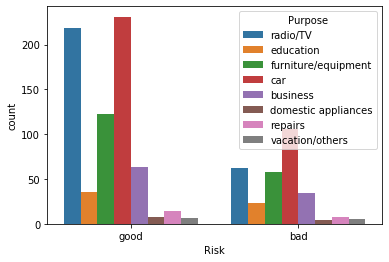

In [75]:
#continue with Saving accounts
sns.countplot(data['Risk'],hue=data['Purpose'])

C:\Users\Renate\Anaconda3\ANACONDA\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


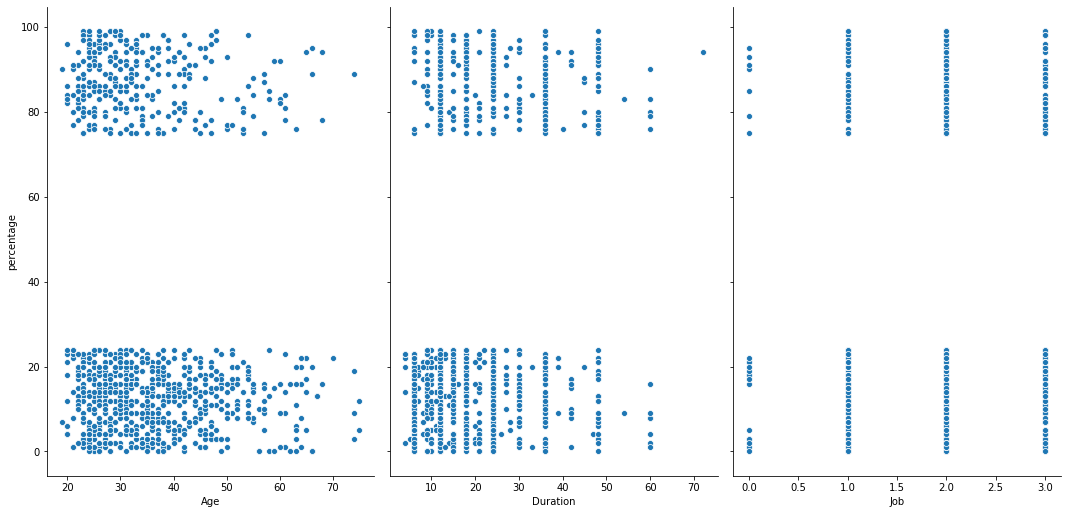

In [76]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['Age','Duration','Job'], y_vars='percentage', size=7, aspect=0.7)

## Making the text columns Numeric
We first need to make all column input numeric to use them further on. 
This is what I will do now. 

In [77]:
#let's load the required packages
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [78]:
#let's see what columns are of the type 'object', those need to be transformed. 
data.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
percentage           int64
dtype: object

In [79]:
def f(df):
    if df[col] == "little":
        val = 7
    elif df[col] == "moderate":
        val = 5
    elif df[col] == "rich":
        val = 1
    elif df[col] == "quite rich":
        val = 3
    else:
        val = 9
    return val

col = 'Checking account'
data['Checking account'] = data.apply(f, axis = 1)

In [80]:
col = 'Saving accounts'
data['Saving accounts'] = data.apply(f, axis = 1)

In [81]:
data.head()

Age     Sex  Job Housing  Saving accounts  Checking account  Credit amount  \
0   67    male    2     own                9                 7           1169   
1   22  female    2     own                7                 5           5951   
2   49    male    1     own                7                 9           2096   
3   45    male    2    free                7                 7           7882   
4   53    male    2    free                7                 7           4870   

   Duration              Purpose  Risk  percentage  
0         6             radio/TV  good          13  
1        48             radio/TV   bad          91  
2        12            education  good          16  
3        42  furniture/equipment  good           8  
4        24                  car   bad          76

In [82]:
def g(df): 
    col = 'Purpose'
    if df[col] == "radio/TV":
        val = 5
    elif df[col] == "education":
        val = 6
    elif df[col] == "furniture/equipement":
        val = 7
    elif df[col] == "car":
        val = 8
    elif df[col] == "business":
        val = 2
    elif df[col] == "domestic appliances":
        val = 4
    elif df[col] == "repairs":
        val = 3
    else:
        val = 1
    return val

data['Purpose'] = data.apply(g, axis = 1)

In [83]:
data.head()

Age     Sex  Job Housing  Saving accounts  Checking account  Credit amount  \
0   67    male    2     own                9                 7           1169   
1   22  female    2     own                7                 5           5951   
2   49    male    1     own                7                 9           2096   
3   45    male    2    free                7                 7           7882   
4   53    male    2    free                7                 7           4870   

   Duration  Purpose  Risk  percentage  
0         6        5  good          13  
1        48        5   bad          91  
2        12        6  good          16  
3        42        1  good           8  
4        24        8   bad          76

In [84]:
data.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts      int64
Checking account     int64
Credit amount        int64
Duration             int64
Purpose              int64
Risk                object
percentage           int64
dtype: object

C:\Users\Renate\Anaconda3\ANACONDA\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


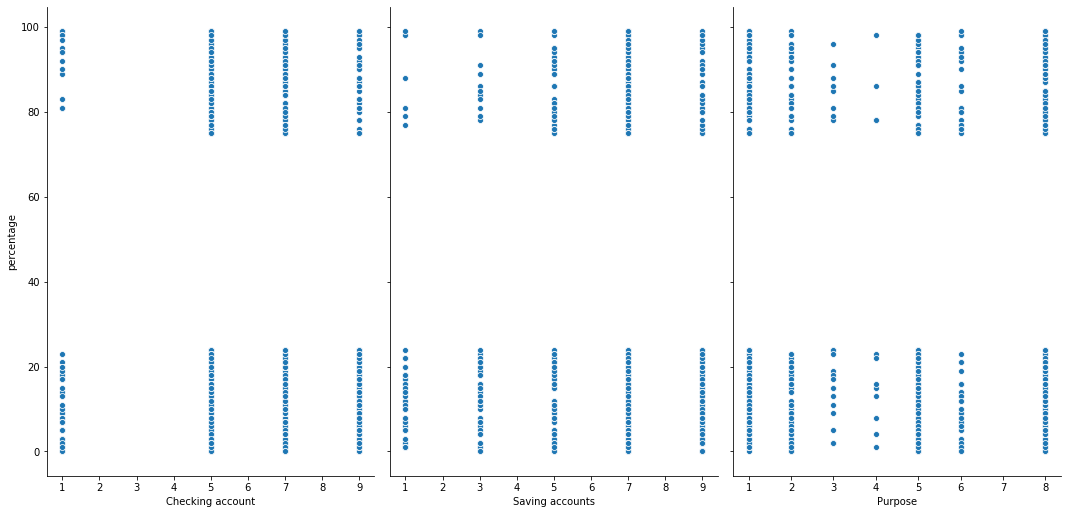

In [85]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['Checking account','Saving accounts','Purpose'], y_vars='percentage', size=7, aspect=0.7)

# Most important features
Let's continue by looking at the most important features according to two different tests. 
Than we will use the top ones to train and test our first model. 

In [86]:
#First we need to split the dataset in the y-column (the target) and the components (X), the independent columns. 
#This is needed as we need to use the X columns to predict the y in the model. 

y = data['percentage'] #the column we want to predict 
X = data.drop(labels = ['Risk', 'percentage'], axis = 1)  #independent columns 

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Name of the column','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

#get correlations of each features in dataset
corrmat = data.drop(labels =['Risk'], axis = 1)
corrmat = corrmat.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))

#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Seems that the models differ in what feature is the most important.
For the first test I will keep:
- Credit amount (high in two tests)
- Duration (high in two tests, negative in the correlation, but this is explainable, as the longer the credit, the higher the risk)
- Age (high in one test, mentioned in the other)
- Checking account (high in two tests)

Let's compare the result with all features

# Machine learning Model
we will use linear regression

In [87]:
from sklearn.linear_model import LinearRegression

## Split the dataset in train and test
Before we are going to use the models choosen, we will first split the dataset in a train and test set.
This because we want to test the performance of the model on the training set and to be able to check it's accuracy. 


In [88]:
from sklearn.model_selection import train_test_split

#First try with the 4 most important features
X_6 = data[['Saving accounts', 'Duration', 'Age', 'Checking account', 'Purpose', 'Credit amount']] #independent columns chosen 
y = data['percentage']    #target column 

#I want to withhold 35 % of the trainset to perform the tests
X_train, X_test, y_train, y_test= train_test_split(X_6,y, test_size=0.35 , random_state = 25)

In [89]:
print('Shape of X_train is: ', X_train.shape)
print('Shape of X_test is: ', X_test.shape)
print('Shape of Y_train is: ', y_train.shape)
print('Shape of y_test is: ', y_test.shape)

Shape of X_train is:  (650, 6)
Shape of X_test is:  (350, 6)
Shape of Y_train is:  (650,)
Shape of y_test is:  (350,)


This looks fine! 

# Try and check the models 

In [90]:
#To check the model, I want to build a check:
import math
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))

In [91]:
# Linear regression model
model_6 = LinearRegression() 
model_6.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [92]:
#Now let's see how this model performs
Predictions = model_6.predict(X_test)
print_metrics(y_test, Predictions, 6)

Mean Square Error      = 1120.643781274764
Root Mean Square Error = 33.47601800206775
Mean Absolute Error    = 28.593880465487032
Median Absolute Error  = 25.4936139347598
R^2                    = 0.0439100335699244
Adjusted R^2           = 0.030013377081115164


#Let's try with all the features
X =  data.drop(labels = ['Risk', 'percentage'], axis = 1)  #independent columns 
y = data['percentage']    #target column 

#I want to withhold 35 % of the trainset to perform the tests
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.35 , random_state = 25)

print('Shape of X_train is: ', X_train.shape)
print('Shape of X_test is: ', X_test.shape)
print('Shape of Y_train is: ', y_train.shape)
print('Shape of y_test is: ', y_test.shape)

# Linear regression model
model = LinearRegression() 
model.fit(X_train, y_train)

#Now let's see how this model performs
Predictions = model.predict(X_test)
print_metrics(y_test, Predictions, 9)

In [93]:
#from site https://planspace.org/20150423-forward_selection_with_statsmodels/

import statsmodels.formula.api as smf

def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {}".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {}".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [94]:
data = data.rename(columns = {'Saving accounts': 'Saving_accounts',
                              'Checking account': 'Checking_account',
                              'Credit amount': 'Credit_amount'})
data = data.drop(labels = ['Risk'], axis = 1)
model_new = forward_selected(data, 'percentage')


In [95]:
print(model_new.model.formula)

percentage ~ Duration + Checking_account + Housing + Age + Sex


In [96]:
print(model_new.rsquared_adj)

0.08037275612977324


In [97]:
#Test with new set of columns
X_new =  data[['Checking_account', 'Duration', 'Saving_accounts',
               'Sex']]  #independent columns 
y = data['percentage']    #target column 

#I want to withhold 35 % of the trainset to perform the tests
X_train, X_test, y_train, y_test= train_test_split(X_new,y, test_size=0.35 , random_state = 25)

print('Shape of X_train is: ', X_train.shape)
print('Shape of X_test is: ', X_test.shape)
print('Shape of Y_train is: ', y_train.shape)
print('Shape of y_test is: ', y_test.shape)

Shape of X_train is:  (650, 4)
Shape of X_test is:  (350, 4)
Shape of Y_train is:  (650,)
Shape of y_test is:  (350,)


# Linear regression model
model_5 = LinearRegression() 
model_5.fit(X_train, y_train)

#Check the performance of the logistic regression model
Predictions = model_5.predict(X_test)
print_metrics(y_test, Predictions, 5)

import scipy.stats as ss

def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    
resid_qq(y_test, Predictions)  

from sklearn.metrics import roc_auc_score
Predictions = model_5.predict(X_test) 
roc_auc_score(y_test, Predictions)

In [98]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': Predictions})
df1 = df.head(25)
print(df1)

     Actual  Predicted
688      21  22.694440
49        8  27.756865
288      16  28.908620
698       3  34.732060
775      76  45.129377
305      12  17.390924
279      15  35.009860
599      20  33.005216
988      16  40.020780
627      99  35.143431
81       14  20.718812
224      16  30.639094
651      75  31.670502
757      97  44.331959
630      15  40.169462
367      20  36.978220
684       0  45.299395
974      23  38.203861
905       4  36.880097
761      97  36.748476
374      83  46.100839
35       87  58.305476
659       3  32.076404
380       6  33.187969
846      78  17.406023
